In [1]:
# Import Libraries
import numpy as np
import random
import time

In [2]:
from Import_Data import import_100k, import_movie_profiles_100k, import_1m, import_movie_profiles_1m, \
import_10m, import_movie_profiles_10m, import_20m, import_movie_profiles_20m, \
import_25m, import_movie_profiles_25m

In [3]:
# Import implemented recommendation algorithms
from Get_Recommendations import get_random_rec, get_popular_rec, get_content_filtered_rec, get_user_based_collab_filtered_rec, get_item_based_collab_filtered_rec, get_category_based_rec

In [4]:
# Import implemented Evaluation Metrics
from eval_metrics import precision_recall, coverage, intra_list_sim

In [5]:
# Import the desired MovieLens Dataset variant
ratings = import_100k()
profiles = import_movie_profiles_100k()

In [24]:
nb_movies = {"100k":1682, "1m": 3952, "10m": 65133, "20m": 131262, "25m":209171}
nb_users = {"100k":943, "1m": 6040, "10m": 71567, "20m": 138493, "25m":162541}
nb_g = {"100k":19, "1m": 19, "10m": 20, "20m": 20, "25m":20}

dataset = "100k"
user_id = random.randint(1, nb_users[dataset]+1)

random_recs = list()
popular_recs = list()
content_filter_recs = list()
usr_collab_recs = list()
item_collab_recs = list()
categorical_recs = list()

# Calculate inference times in seconds
inference_times = {
    "random_recs": list(),
    "popular_recs": list(),
    "content_filter_recs": list(),
    "usr_collab_recs": list(),
    "item_collab_recs": list(),
    "categorical_recs": list()
}

for k in range(5,31,5):
    # k is the number of recommendations
    # sim_u is the number of similar users to conisider in user_based_collab_filtered_rec
    sim_u = 20
    # sim_n is the number of similar users to conisider in item_based_collab_filtered_rec
    sim_n = 20

    u = nb_users[dataset]
    m = nb_movies[dataset]
    m_profiles = profiles
    nb_genres = nb_g[dataset]
    
    random_rec, ti = get_random_rec(k, m)
    random_recs.append(random_rec)
    inference_times["random_recs"].append(ti)

    popular_rec, ti = get_popular_rec(ratings, k)
    popular_recs.append(popular_rec)
    inference_times["popular_recs"].append(ti)

    content_filter_rec, ti = get_content_filtered_rec(user_id, ratings, m_profiles, k, nb_genres)
    content_filter_recs.append(content_filter_rec)
    inference_times["content_filter_recs"].append(ti)
    
    usr_collab_rec, ti = get_user_based_collab_filtered_rec(user_id, ratings, sim_u, k, m)
    usr_collab_recs.append(usr_collab_rec)
    inference_times["usr_collab_recs"].append(ti)
    
    item_collab_rec, ti = get_item_based_collab_filtered_rec(user_id, ratings, sim_n, k, m)
    item_collab_recs.append(item_collab_rec)
    inference_times["item_collab_recs"].append(ti)
    
    categorical_rec, ti = get_category_based_rec(user_id, ratings, m_profiles, k, nb_genres)
    categorical_recs.append(categorical_rec)
    inference_times["categorical_recs"].append(ti)

In [25]:
# Visualising results
import matplotlib.pyplot as plt

nb_recs = [5,10,15,20,25,30]

precisions = list()
recalls = list()
coverages = list()
intra_list_similarities = list()

for rec in categorical_recs:
    precision, recall = precision_recall(rec, ratings[user_id])
    cvrg = coverage(rec, m_profiles)
    intra_list_similarity = intra_list_sim(rec, m_profiles)
    
    precisions.append(precision)
    recalls.append(recall)
    coverages.append(cvrg)
    intra_list_similarities.append(intra_list_similarity)

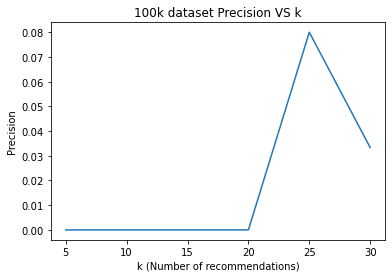

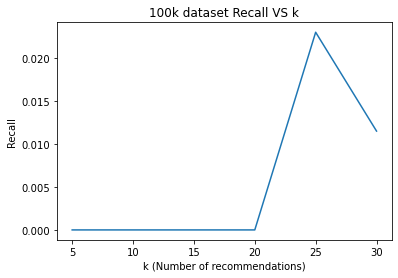

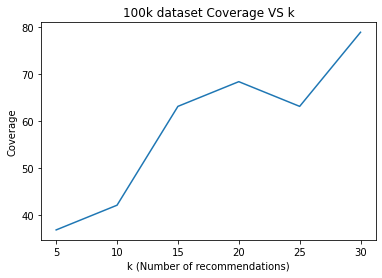

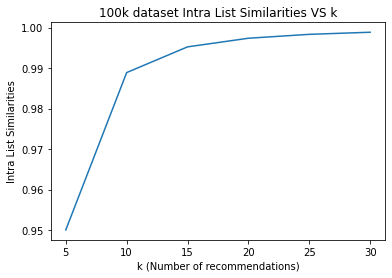

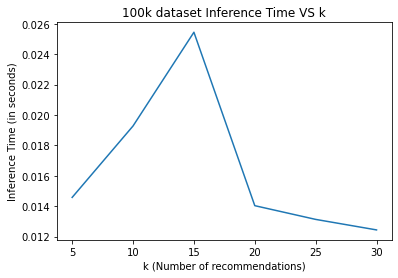

In [26]:
times = inference_times["categorical_recs"]
# Plotting graph for Precision
plt.plot(nb_recs, precisions)
plt.title('100k dataset Precision VS k')
plt.ylabel('Precision')
plt.xlabel('k (Number of recommendations)')
plt.show()

# Plotting graph for Recall
plt.plot(nb_recs, recalls)
plt.title('100k dataset Recall VS k')
plt.ylabel('Recall')
plt.xlabel('k (Number of recommendations)')
plt.show()

# Plotting graph for Coverage
plt.plot(nb_recs, coverages)
plt.title('100k dataset Coverage VS k')
plt.ylabel('Coverage')
plt.xlabel('k (Number of recommendations)')
plt.show()

# Plotting graph for Intra List Similarity
plt.plot(nb_recs, intra_list_similarities)
plt.title('100k dataset Intra List Similarities VS k')
plt.ylabel('Intra List Similarities')
plt.xlabel('k (Number of recommendations)')
plt.show()

# Plotting graph for Inference Times
plt.plot(nb_recs, times)
plt.title('100k dataset Inference Time VS k')
plt.ylabel('Inference Time (in seconds)')
plt.xlabel('k (Number of recommendations)')
plt.show()
